 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [4]:
# Reading whale returns
whale_csv_path = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_csv_path,index_col = 'Date' ,infer_datetime_format = True,parse_dates = True)

In [5]:
# Count nulls
whale_returns_df.isna().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [6]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_csv_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_csv_path,index_col = 'Date' ,infer_datetime_format = True,parse_dates = True)

In [8]:
# Count nulls
algo_df.isna().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [9]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
SP_csv_path = Path("Resources/sp_tsx_history.csv")
SP_df = pd.read_csv(SP_csv_path,index_col = 'Date' ,infer_datetime_format = True,parse_dates = True)

In [11]:
# Check Data Types
data_types = SP_df.dtypes
print(data_types)


Close    object
dtype: object


In [12]:
# Fix Data Types
SP_df['Close'] = SP_df['Close'].str.replace('$',"")
SP_df['Close'] = SP_df['Close'].str.replace(',',"")
SP_df['Close'] = SP_df['Close'].astype(float)
SP_df

/var/folders/dq/3170fsj54mj7dvthb0kwkzww0000gn/T/ipykernel_37457/1021526567.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  SP_df['Close'] = SP_df['Close'].str.replace('$',"")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [13]:
# Calculate Daily Returns
SP_df['Close'] = SP_df['Close'].pct_change()

In [14]:
# Drop nulls
SP_df = SP_df.dropna()

In [15]:
# Rename `Close` Column to be spec
SP_df = SP_df.rename(columns={"Close": "S&P TSX 60"})
SP_df

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_returns_df, algo_df, SP_df], axis='columns',join = 'inner')
                        
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns of Portfolios'}, xlabel='Date'>

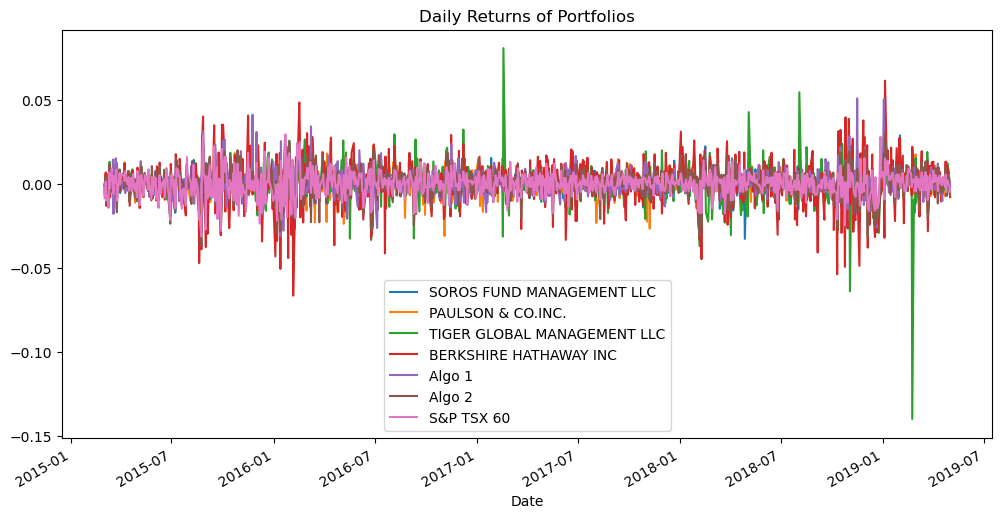

In [17]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(12, 6), title="Daily Returns of Portfolios")

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

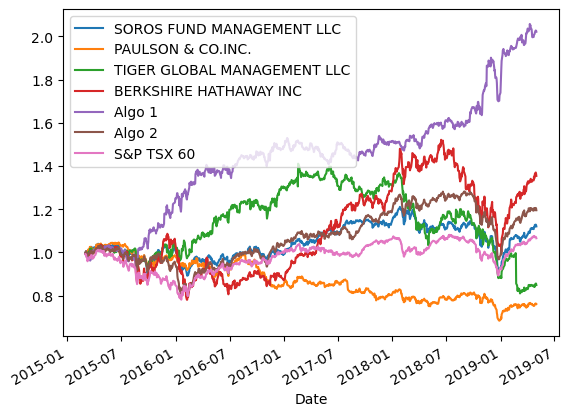

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

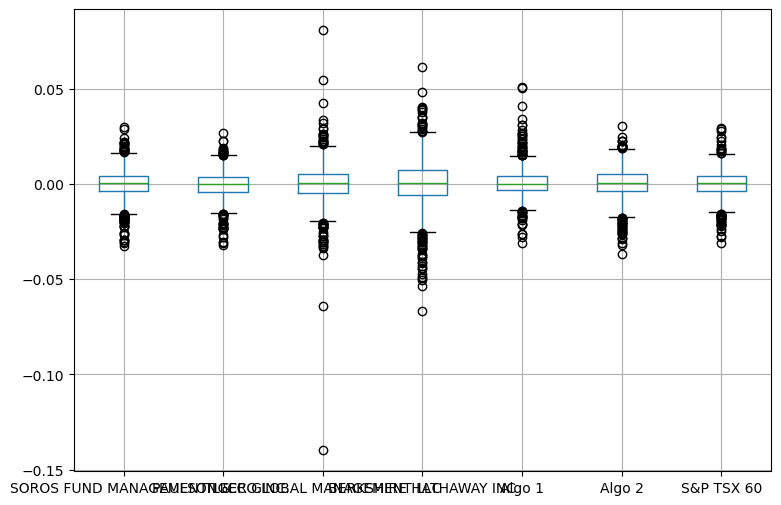

In [19]:
# Box plot to visually show risk
all_returns.boxplot(figsize=(9, 6))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
Portfolio_std = all_returns.std()
Portfolio_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
riskier_portfolios = Portfolio_std[Portfolio_std > all_returns["S&P TSX 60"].std()]
# Determine which portfolios are riskier than the S&P TSX 60
riskier_portfolios

SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std_dev = Portfolio_std * (252 ** 0.5)
annualised_std_dev

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

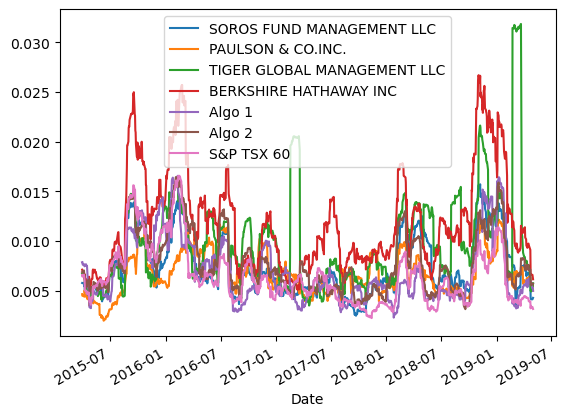

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_returns_rollingstd = all_returns.rolling(window=21).std()
# Plot the rolling standard deviation
all_returns_rollingstd.plot()

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
all_returns_corr = all_returns.corr()
# Display de correlation matrix
all_returns_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<Axes: xlabel='Date'>

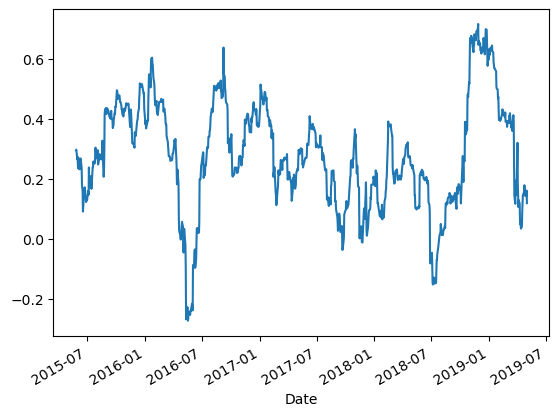

In [25]:
# Calculate covariance of a single portfolio
# chosen_portfolio is  Algo1
algo1_covar = all_returns['Algo 1'].rolling(window = 60).cov(all_returns['S&P TSX 60'])

# Calculate variance of S&P TSX
sp_var = all_returns['S&P TSX 60'].rolling(window = 60).var()
# Computing beta
rolling_beta = algo1_covar/sp_var
# Plot beta trend
rolling_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [26]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [172]:
# Annualized Sharpe Ratios
risk_free_rate = 0.02  # Assume a risk-free rate of 2%

sharpe_ratios = (all_returns.mean() - risk_free_rate) / annualised_std_dev
sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.159816
PAULSON & CO.INC.             -0.182612
TIGER GLOBAL MANAGEMENT LLC   -0.116342
BERKSHIRE HATHAWAY INC        -0.096379
Algo 1                        -0.160098
Algo 2                        -0.149738
S&P TSX 60                    -0.178333
dtype: float64

<Axes: title={'center': 'Sharpe Ratios of Portfolios'}>

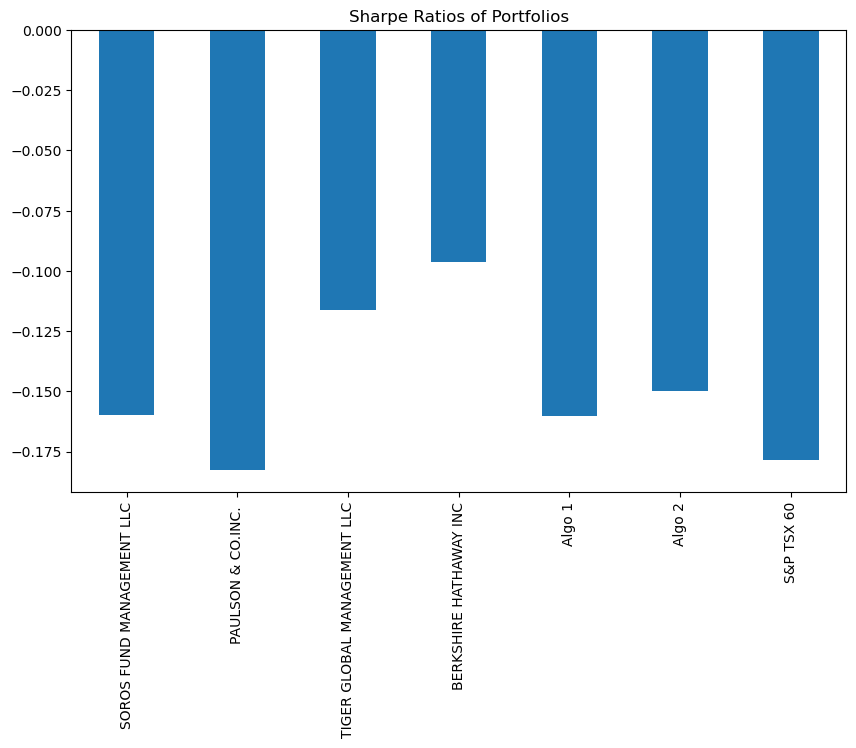

In [173]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(10, 6), title="Sharpe Ratios of Portfolios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---Algo 1  and 2 both outperform Tiger and Berkshire, however neither outperform Paulson or the S&P TSX 600

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
csv_path = Path("Resources/Googledata.csv",infer_datetime_format = True)
google_data = pd.read_csv(csv_path).set_index('Date')
google_data


,Close
Date,
1/3/2022 16:00:00,145.07
1/4/2022 16:00:00,144.42
1/5/2022 16:00:00,137.65
1/6/2022 16:00:00,137.55
1/7/2022 16:00:00,137.00
...,...
12/23/2022 16:00:00,89.81
12/27/2022 16:00:00,87.93
12/28/2022 16:00:00,86.46


In [100]:
# Reading data from 2nd stock
csv_path = Path("Resources/TSLAdata.csv",infer_datetime_format = True)
TSLA_data = pd.read_csv(csv_path).set_index('Date')
TSLA_data

,Close
Date,
1/3/2022 16:00:00,399.93
1/4/2022 16:00:00,383.20
1/5/2022 16:00:00,362.71
1/6/2022 16:00:00,354.90
1/7/2022 16:00:00,342.32
...,...
12/23/2022 16:00:00,123.15
12/27/2022 16:00:00,109.10
12/28/2022 16:00:00,112.71


In [101]:
# Reading data from 3rd stock
csv_path = Path("Resources/NVDAdata.csv",infer_datetime_format = True)
NVDA_data = pd.read_csv(csv_path).set_index('Date')
NVDA_data

,Close
Date,
1/3/2022 16:00:00,301.21
1/4/2022 16:00:00,292.90
1/5/2022 16:00:00,276.04
1/6/2022 16:00:00,281.78
1/7/2022 16:00:00,272.47
...,...
12/23/2022 16:00:00,152.06
12/27/2022 16:00:00,141.21
12/28/2022 16:00:00,140.36


In [102]:
# Combine all stocks in a single DataFrame
combined_data = pd.concat([google_data,TSLA_data,NVDA_data],axis = 'columns',join = 'outer')



In [103]:
# Reset Date index
combined_data = combined_data
combined_data

,Close,Close,Close
Date,,,
1/3/2022 16:00:00,145.07,399.93,301.21
1/4/2022 16:00:00,144.42,383.20,292.90
1/5/2022 16:00:00,137.65,362.71,276.04
1/6/2022 16:00:00,137.55,354.90,281.78
1/7/2022 16:00:00,137.00,342.32,272.47
...,...,...,...
12/23/2022 16:00:00,89.81,123.15,152.06
12/27/2022 16:00:00,87.93,109.10,141.21
12/28/2022 16:00:00,86.46,112.71,140.36


In [104]:
# Reorganize portfolio data by having a column per symbol
combined_data.columns = ['GOOG','TSLA','NVDA']
combined_data

,GOOG,TSLA,NVDA
Date,,,
1/3/2022 16:00:00,145.07,399.93,301.21
1/4/2022 16:00:00,144.42,383.20,292.90
1/5/2022 16:00:00,137.65,362.71,276.04
1/6/2022 16:00:00,137.55,354.90,281.78
1/7/2022 16:00:00,137.00,342.32,272.47
...,...,...,...
12/23/2022 16:00:00,89.81,123.15,152.06
12/27/2022 16:00:00,87.93,109.10,141.21
12/28/2022 16:00:00,86.46,112.71,140.36


In [132]:
# Calculate daily returns
daily_returns = combined_data.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna()
# Display sample data
daily_returns

,GOOG,TSLA,NVDA
Date,,,
1/4/2022 16:00:00,-0.004481,-0.041832,-0.027589
1/5/2022 16:00:00,-0.046877,-0.053471,-0.057562
1/6/2022 16:00:00,-0.000726,-0.021532,0.020794
1/7/2022 16:00:00,-0.003999,-0.035447,-0.033040
1/10/2022 16:00:00,0.011460,0.030352,0.005615
...,...,...,...
12/23/2022 16:00:00,0.017562,-0.017551,-0.008671
12/27/2022 16:00:00,-0.020933,-0.114089,-0.071353
12/28/2022 16:00:00,-0.016718,0.033089,-0.006019


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [133]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)



# Display sample data
portfolio_returns

Date
1/4/2022 16:00:00     -0.024634
1/5/2022 16:00:00     -0.052637
1/6/2022 16:00:00     -0.000488
1/7/2022 16:00:00     -0.024162
1/10/2022 16:00:00     0.015809
                         ...   
12/23/2022 16:00:00   -0.002887
12/27/2022 16:00:00   -0.068792
12/28/2022 16:00:00    0.003451
12/29/2022 16:00:00    0.050007
12/30/2022 16:00:00    0.003148
Length: 250, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [134]:
# Join your returns DataFrame to the original returns DataFrame
daily_returns['Portfolio returns'] = portfolio_returns
daily_returns


,GOOG,TSLA,NVDA,Portfolio returns
Date,,,,
1/4/2022 16:00:00,-0.004481,-0.041832,-0.027589,-0.024634
1/5/2022 16:00:00,-0.046877,-0.053471,-0.057562,-0.052637
1/6/2022 16:00:00,-0.000726,-0.021532,0.020794,-0.000488
1/7/2022 16:00:00,-0.003999,-0.035447,-0.033040,-0.024162
1/10/2022 16:00:00,0.011460,0.030352,0.005615,0.015809
...,...,...,...,...
12/23/2022 16:00:00,0.017562,-0.017551,-0.008671,-0.002887
12/27/2022 16:00:00,-0.020933,-0.114089,-0.071353,-0.068792
12/28/2022 16:00:00,-0.016718,0.033089,-0.006019,0.003451


In [135]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns.dropna()

,GOOG,TSLA,NVDA,Portfolio returns
Date,,,,
1/4/2022 16:00:00,-0.004481,-0.041832,-0.027589,-0.024634
1/5/2022 16:00:00,-0.046877,-0.053471,-0.057562,-0.052637
1/6/2022 16:00:00,-0.000726,-0.021532,0.020794,-0.000488
1/7/2022 16:00:00,-0.003999,-0.035447,-0.033040,-0.024162
1/10/2022 16:00:00,0.011460,0.030352,0.005615,0.015809
...,...,...,...,...
12/23/2022 16:00:00,0.017562,-0.017551,-0.008671,-0.002887
12/27/2022 16:00:00,-0.020933,-0.114089,-0.071353,-0.068792
12/28/2022 16:00:00,-0.016718,0.033089,-0.006019,0.003451


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [136]:
# Calculate the annualized `std`
ytd_std = daily_returns['Portfolio returns'].std()

# Convert daily standard deviation to annualized standard deviation
trading_days_per_year = 252  # Assuming 252 trading days in a year
annualized_std = ytd_std * np.sqrt(trading_days_per_year)
annualized_std

0.49449554533135215

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

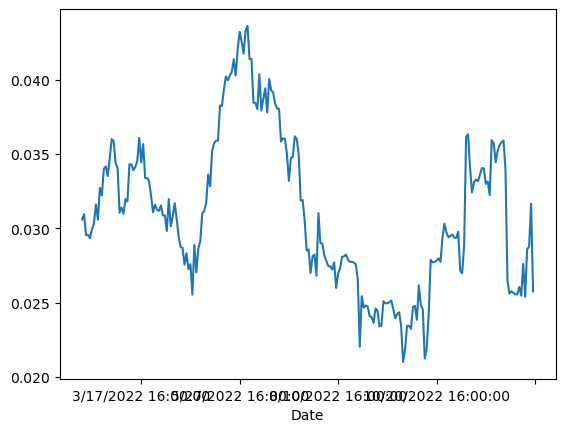

In [137]:
# Calculate rolling standard deviation
rolling_std = daily_returns['Portfolio returns'].rolling(window = 21).std()


# Plot rolling standard deviation
rolling_std_plot = rolling_std.plot()
rolling_std_plot

### Calculate and plot the correlation

In [138]:
# Calculate and plot the correlation
daily_returns.corr()

,GOOG,TSLA,NVDA,Portfolio returns
GOOG,1.000000,0.556668,0.767514,0.834464
TSLA,0.556668,1.000000,0.680199,0.876351
NVDA,0.767514,0.680199,1.000000,0.927156
Portfolio returns,0.834464,0.876351,0.927156,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: xlabel='Date'>

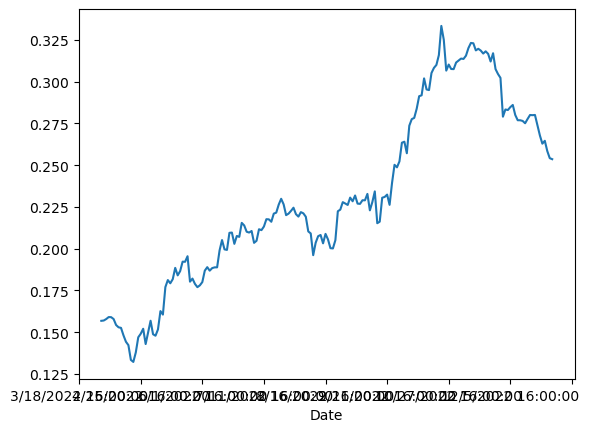

In [195]:
# Calculate and plot Beta
TSX_updated = pd.read_csv("Resources/TSX.csv").set_index('Date')
TSX_updated = TSX_updated.pct_change()
TSX_updated = TSX_updated.dropna()
final = pd.concat([daily_returns,TSX_updated],join = 'inner',axis = 1)
final.columns = ['GOOG','TSLA','NVDA','Portfolio returns','S&P 60 TSX']
rolling_covariance = final['Portfolio returns'].rolling(window=60).cov(final['S&P 60 TSX'])
rolling_variance = final['Portfolio returns'].rolling(window=60).var()

rolling_beta = rolling_covariance/rolling_variance

rolling_beta.plot()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [196]:
# Calculate Annualized Sharpe Ratios
risk_free_rate_2nd = 0.02  # Assume a risk-free rate of 2%

sharpe_ratios_new = (final.mean() - risk_free_rate) / annualized_std
sharpe_ratios_new

GOOG                -0.043601
TSLA                -0.047378
NVDA                -0.043464
Portfolio returns   -0.044814
S&P 60 TSX          -0.041511
dtype: float64

<Axes: title={'center': 'Sharpe Ratios of Portfolios'}>

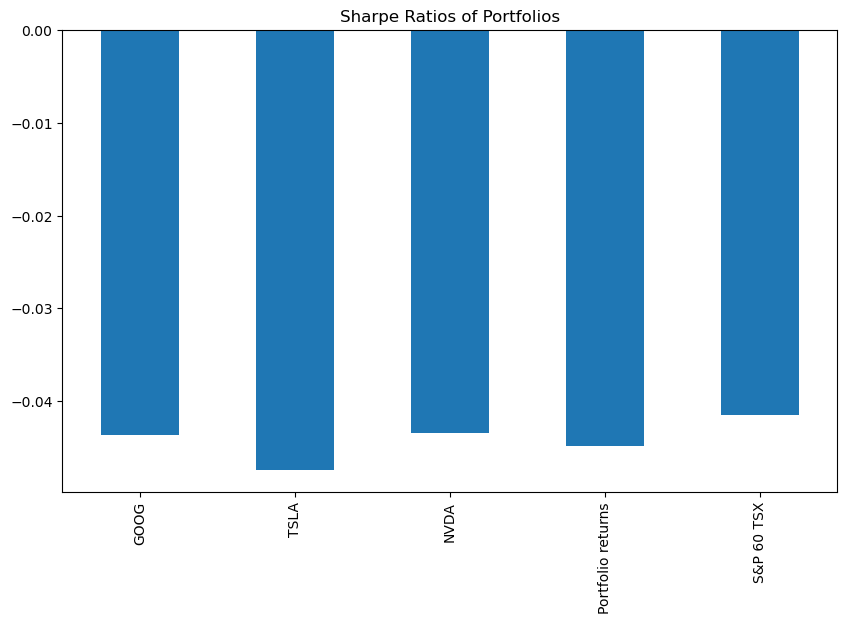

In [197]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_new.plot(kind="bar", figsize=(10, 6), title="Sharpe Ratios of Portfolios")

### How does your portfolio do?

Write your answer here!

In [201]:
#The portfolio sharpe ratio is above the S&P 60 TSX, and all the other individual stocks, which is a good indication that substanial returns will be generated from this portfolio. 
